Take Home Exam 2 Code by Swapnil Sagar

In [125]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random
import scipy as scipy

Create some lists to be used later

In [132]:
pList=[0, 0.0001, 0.00025, 0.0005, 0.00075, 0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
lDict=dict()
cDict=dict()
GDict=dict()
tDict=dict()
tHalfDict=dict()

Generate Watts Strogatz Graphs for all 'p'

In [57]:
for p in pList:
    G=nx.watts_strogatz_graph(1000, 10, p)
    l=nx.average_shortest_path_length(G)
    lDict[p]=l
    c=nx.average_clustering(G)
    cDict[p]=c
    GDict[p]=G

In [118]:
print(lDict)
print(cDict)
print(GDict)

{}
{}
{}


The model

In [133]:
def SIRModel(G, p):
    t=0
    tHalf=0
    statusList=dict() # 0 = S, 1 = I, 2 = R
    infectionList=[]
    firstTime=True

    for i in range(0, 1000):
        statusList[i]=0
    
    lamb=random.randint(0, 999)
    statusList[lamb]=1
    infectionList.append(lamb)

    for time in range(0, 1200000000): # 1.2 billion time iterations
        #if(time%10==0):
        print("Current Time: ", t, " Number of Nodes: ", G.number_of_nodes(), "Infected: ", len(infectionList))
            
        if(G.number_of_nodes()==0):
            print("No nodes in graph for ", p)
            break
        newInfection=[]
        for infected in infectionList:
            if not G.has_node(infected):
                #print(infected, "Already deleted")
                continue
            #We will now generate all neighbours of an infected node
            susceptibleNeighbours=G.neighbors(infected)
            #Each neighbour of an infected node is susceptible, since we take infection rate=1, we add all healthy neighbours
            for susceptible in susceptibleNeighbours:
                if G.has_node(susceptible) and statusList[susceptible]==0:
                    newInfection.append(susceptible)
                    statusList[susceptible]=1
            #We will remove the previously infected node
            G.remove_node(infected)
            statusList[infected]=2

        infectionList.clear() #Empty infectionList
        #To remove any duplicate values and add newly infected people to infectionList    
        for ni in newInfection:
            if ni not in infectionList:
                infectionList.append(ni)
        
        infected=0
        for i in range (0, 1000):
            if statusList[i]!=0:
                infected=infected+1
        
        if(infected>=500 and firstTime):
            tHalf=time
            firstTime=False
            print("Reached half way point", tHalf)

        if len(infectionList)==0:
            print("Simulation Over with ", (1000-infected), "left!", t)
            break

        t=time
    
    tHalfDict[p]=tHalf
    tDict[p]=t
    print("Completed execution for ", p)

We will now run the model on the various Watts Sttrogatz Graphs

In [134]:
for p in pList:
    G=nx.watts_strogatz_graph(1000, 10, p)
    l=nx.average_shortest_path_length(G)
    lDict[p]=l
    c=nx.average_clustering(G)
    cDict[p]=c
    GDict[p]=G

for p in pList:
    SIRModel(GDict[p], p)
print(tHalfDict)
print(tDict)

Current Time:  0  Number of Nodes:  1000 Infected:  1
Current Time:  0  Number of Nodes:  999 Infected:  10
Current Time:  1  Number of Nodes:  989 Infected:  10
Current Time:  2  Number of Nodes:  979 Infected:  10
Current Time:  3  Number of Nodes:  969 Infected:  10
Current Time:  4  Number of Nodes:  959 Infected:  10
Current Time:  5  Number of Nodes:  949 Infected:  10
Current Time:  6  Number of Nodes:  939 Infected:  10
Current Time:  7  Number of Nodes:  929 Infected:  10
Current Time:  8  Number of Nodes:  919 Infected:  10
Current Time:  9  Number of Nodes:  909 Infected:  10
Current Time:  10  Number of Nodes:  899 Infected:  10
Current Time:  11  Number of Nodes:  889 Infected:  10
Current Time:  12  Number of Nodes:  879 Infected:  10
Current Time:  13  Number of Nodes:  869 Infected:  10
Current Time:  14  Number of Nodes:  859 Infected:  10
Current Time:  15  Number of Nodes:  849 Infected:  10
Current Time:  16  Number of Nodes:  839 Infected:  10
Current Time:  17  Nu

We will now pre-process the data inorder to plot the graphs

In [135]:
newPList=[0.0001, 0.00025, 0.0005, 0.00075, 0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for newP in newPList:
    #tHalfDict[newP]=tHalfDict[newP]/tHalfDict[0]
    tDict[newP]=tDict[newP]/tDict[0]
    lDict[newP]=lDict[newP]/lDict[0]

del tDict[0]
del lDict[0]
del tHalfDict[0]

Figure 3.a

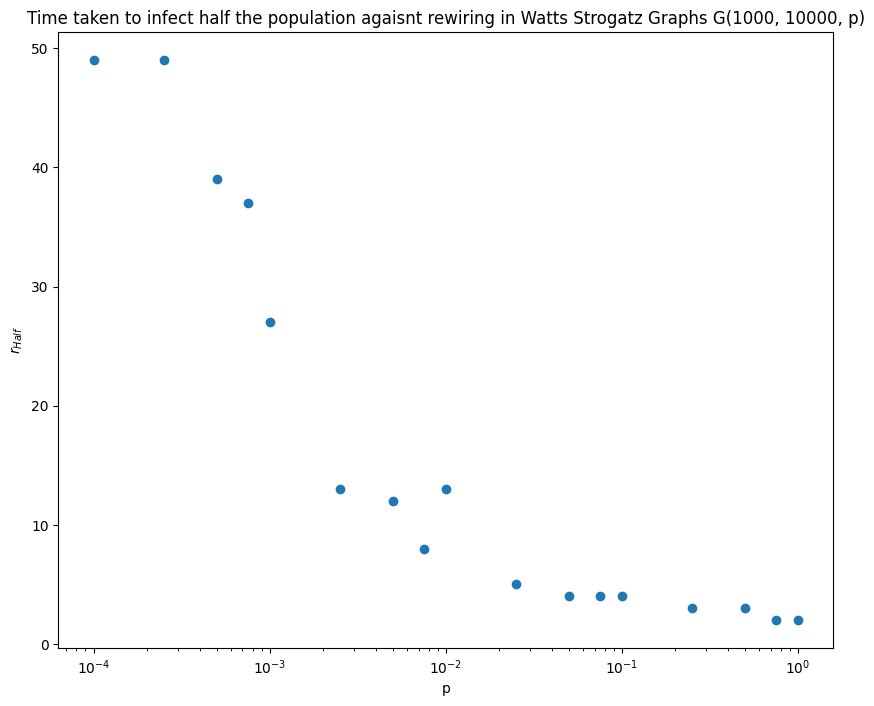

In [145]:
x=list(tHalfDict.keys())
y=list(tHalfDict.values())

plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.xscale('log')
#plt.ylim(0,1.1)
plt.xlabel('p')
plt.ylabel('$r_{Half}$')
plt.title("Time taken to infect half the population agaisnt rewiring in Watts Strogatz Graphs G(1000, 10000, p)")
plt.savefig("./figures/3a rHalf vs p.png")
plt.show()

Figure 3.b

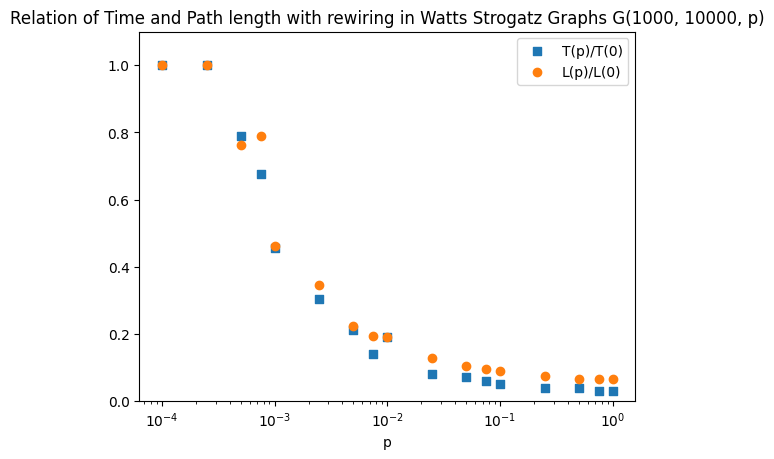

In [141]:
x=list(lDict.keys())
y2=list(tDict.values())
y1=list(lDict.values())

plt.figure(figsize=(6, 4))
plt.scatter(x, y2, label='T(p)/T(0)',marker='s')
plt.scatter(x, y1, label='L(p)/L(0)')
plt.xscale('log')
plt.ylim(0,1.1)
plt.xlabel('p')
plt.legend(loc='upper right')
plt.title("Relation of Time and Path length with rewiring in Watts Strogatz Graphs G(1000, 10000, p)")
plt.savefig("./figures/3b Relation of Time and Path length with p.png")
plt.show()